In [1]:
%matplotlib notebook
import processmcrat as pm
import astropy.units as unit
from astropy import constants as const
import matplotlib.pyplot as plt
import numpy as np

'''
Testing out how to plot multiple spectra in same plot
'''

In [24]:
mcrat_sim1=pm.McratSimLoad("/Users/josearita-escalante/Documents/GRB-NASA/MCRaT-gits/Hydro-Sim/PLUTO/mcrat/science/1/") 
mcrat_sim1.load_frame(250, read_stokes=False)
observation1=pm.MockObservation(1, 30, 1e14, 5, mcratsimload_obj=mcrat_sim1)

In [25]:
spectrum_dict1=observation1.spectrum(5, 125)
observation1.set_spectral_fit_parameters()
lightcurve_dict1=observation1.lightcurve(time_start=5, time_end=125, dt=0.2)

In [70]:
observation1.detected_photons.detection_time.min()

6.1479683207103335

In [32]:
mcrat_sim2=pm.McratSimLoad("/Users/josearita-escalante/Documents/GRB-NASA/MCRaT-gits/Hydro-Sim/PLUTO/mcrat/science/2/") 
mcrat_sim2.load_frame(250, read_stokes=False)
observation2=pm.MockObservation(1, 30, 1e14, 5, mcratsimload_obj=mcrat_sim2)

In [33]:
spectrum_dict2=observation2.spectrum(5, 125)
observation2.set_spectral_fit_parameters()
lightcurve_dict2=observation2.lightcurve(time_start=5, time_end=125, dt=0.2)

In [34]:
spec_list=[spectrum_dict1,spectrum_dict2]

<IPython.core.display.Javascript object>


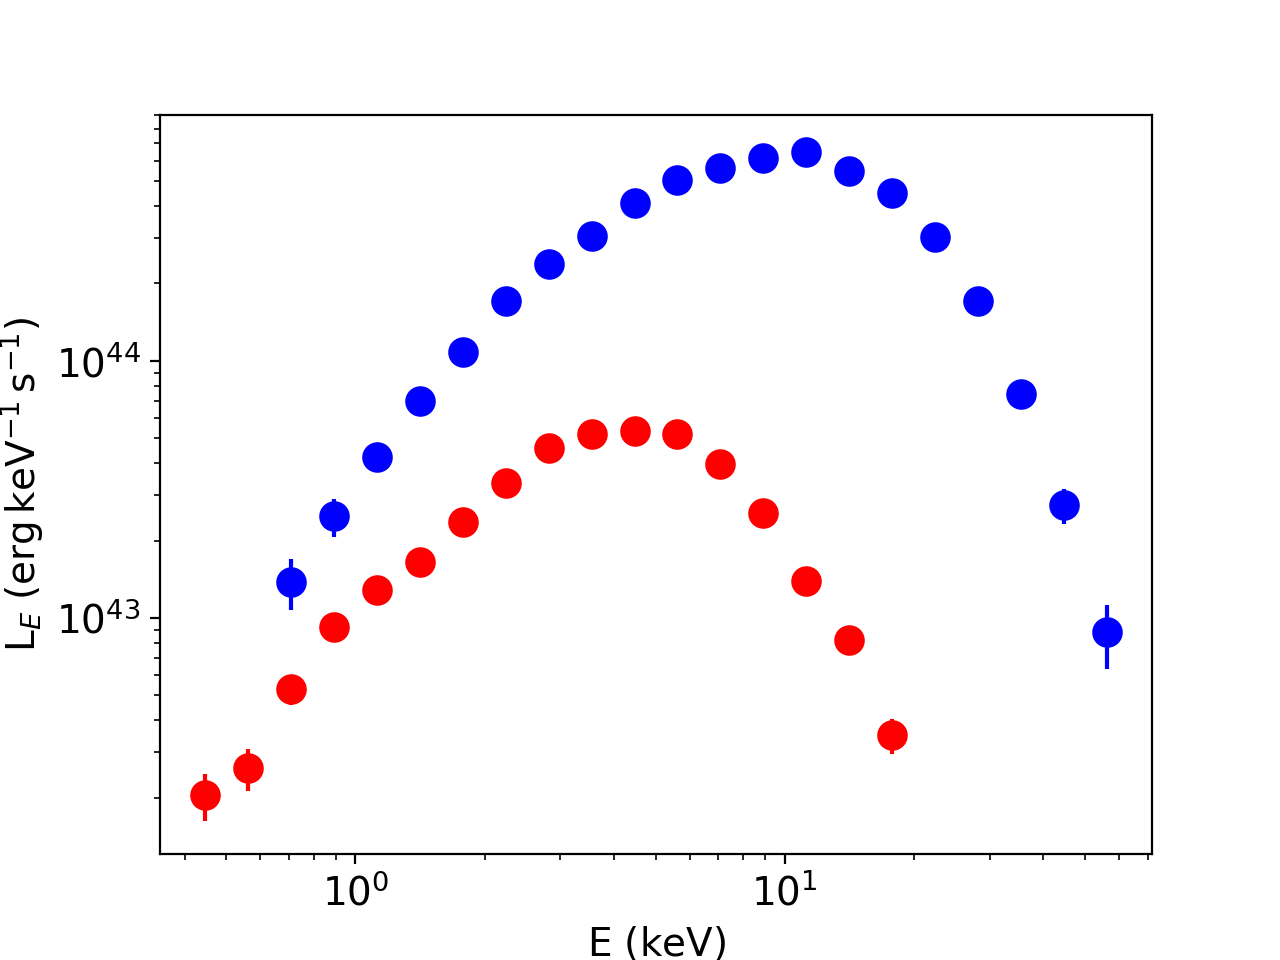

In [71]:
photon_num_min=10

f, axarr = plt.subplots(1, sharex=True)
axarr_spex = axarr
 
plt.rcParams.update({'font.size': 14})

idx1=np.where(spectrum_dict1['ph_num']>photon_num_min)[0]
axarr_spex.loglog(spectrum_dict1['energy_bin_center'][idx1], spectrum_dict1['spectrum'][idx1], 'b.')
axarr_spex.errorbar(spectrum_dict1['energy_bin_center'][idx1], spectrum_dict1['spectrum'][idx1],\
                        yerr=spectrum_dict1['spectrum_errors'][idx1], color='b', marker='o', ls='None', 
                        markersize=10, label='Total Spectrum')

axarr_spex.set_xlabel(r'E' + ' ('+spectrum_dict1['energy_bin_center'].unit.to_string('latex_inline')+')', 
                              fontsize=14)
axarr_spex.set_ylabel(r'L$_E$ ('+spectrum_dict1['spectrum'][idx1].unit.to_string('latex_inline')+')', 
                              fontsize=14)

idx2=np.where(spectrum_dict2['ph_num']>photon_num_min)[0]
axarr_spex.loglog(spectrum_dict2['energy_bin_center'][idx2], spectrum_dict2['spectrum'][idx2], 'r.')
axarr_spex.errorbar(spectrum_dict2['energy_bin_center'][idx2], spectrum_dict2['spectrum'][idx2],\
                        yerr=spectrum_dict2['spectrum_errors'][idx2], color='r', marker='o', ls='None', 
                        markersize=10, label='Total Spectrum')

 
#axarr_spex.set_ylabel(r'L$_E$ ('+spectrum_dict1['spectrum'][idx1].unit.to_string('latex_inline')+')', 
                              #fontsize=14)



plt.show()



In [72]:
idx1

array([68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
       85, 86, 87])